# Exercícios Pré-Processamento

Iremos realizar um rápido exercício utilizando a biblioteca pandas, usando o dataset de salários da cidade de São Francisco do Kaggle [Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries).

** Importar o pandas as pd.**

In [1]:
import pandas as pd
%matplotlib inline

** Salvar Salaries.csv como um dataframe chamado sal.**

In [2]:
df_sal = pd.read_csv('./Datasets/Salaries.csv')

** Visualizar o cabeçalho do DataFrame. **

In [3]:
df_sal.head(10)

Id        EmployeeName                                        JobTitle  \
0   1      NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2        GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3      ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4   CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5     PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   
5   6      DAVID SULLIVAN                       ASSISTANT DEPUTY CHIEF II   
6   7           ALSON LEE              BATTALION CHIEF, (FIRE DEPARTMENT)   
7   8       DAVID KUSHNER                  DEPUTY DIRECTOR OF INVESTMENTS   
8   9      MICHAEL MORRIS              BATTALION CHIEF, (FIRE DEPARTMENT)   
9  10  JOANNE HAYES-WHITE          CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   
5  118602.00      8601.00  189082.74       NaN  316285.74         316285.74   
6   92492.01     89062.90  134426.14       NaN  315981.05         315981.05   
7  256576.96         0.00   51322.50       NaN  307899.46         307899.46   
8  176932.64     86362.68   40132.23       NaN  303427.55         303427.55   
9  285262.00         0.00   17115.73       NaN  302377.73         302377.73   

   Year  Notes         Agency  Status  
0  2011    NaN  San Francisco     NaN  
1  2011    NaN  San Francisco     NaN  
2  2011    NaN  San Francisco     NaN  
3  2011    NaN  San Francisco     NaN  
4  2011    NaN  San Francisco     NaN  
5  2011    NaN  San Francisco     NaN  
6  2011    NaN  San Francisco     NaN  
7  2011    NaN  San Francisco     NaN  
8  2011    NaN  San Francisco     NaN  
9  2011    NaN  San Francisco     NaN

** Usar o método .info() para visualizar a quantidade de registros.**

In [4]:
df_sal.info() # 148654 linhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**Qual a média do salário base (BasePay) ?**

In [5]:
df_sal['BasePay'].mean()

66325.44884050643

**Distribuição dos salários (BasePay) ?**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000118E9860>]],
      dtype=object)

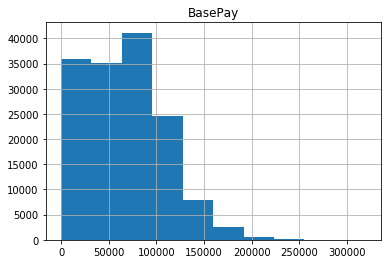

In [6]:
df_sal.hist(column='BasePay')

** Qual o maior valor pago de hora extra no dataset ? **

In [7]:
df_sal['OvertimePay'].max()

245131.88

** Qual o cargo de JOSEPH DRISCOLL ? Observação: Use todas as letras maiúsculas ou você pode receber uma resposta que não fecha (Existe um Joseph Driscoll com letras minúsculas). **

In [8]:
df_sal[df_sal['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

** Quanto JOSEPH DRISCOLL ganha (incluindo benefícios)? **

In [9]:
df_sal[df_sal['EmployeeName']=='JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

** Qual o nome da pessoa com maior salário (incluindo benefícios)?**

In [10]:
df_sal[df_sal['TotalPayBenefits']== df_sal['TotalPayBenefits'].max()] 

Id    EmployeeName                                        JobTitle  \
0   1  NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18          0.0  400184.25       NaN  567595.43         567595.43   

   Year  Notes         Agency  Status  
0  2011    NaN  San Francisco     NaN

** Qual a média de salário base dos empregados por ano (2011-2014) ? **

In [11]:
df_sal.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

** Quantos cargos distintos há?**

In [12]:
df_sal['JobTitle'].nunique()

2159

** Quais os 5 cargos mais comuns? **

In [13]:
df_sal['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

** Há correlação entre o tamanho do nome do cargo e o salário? **

In [14]:
df_sal['title_len'] = df_sal['JobTitle'].apply(len)

In [15]:
df_sal[['title_len','TotalPayBenefits']].corr() # Não há correlação

title_len  TotalPayBenefits
title_len          1.000000         -0.036878
TotalPayBenefits  -0.036878          1.000000

# Bom Trabalho!